### Problem statement
Clustering: Hierarchical

Dataset: Cities_r2.csv

Apply Data pre-processing (Label Encoding , Data
Transformation....) techniques if necessary.

Apply Hierarchical clusteringalgorithms (based on
effective_literacy_rate_total column) to find the group of customers.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("../all_datasets/K-Means & Hirarchical Clustering/cities_r2.csv")
df.head(5)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [50]:
data = df[['effective_literacy_rate_total']]

In [51]:
#standardizing the data
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

### Making Dendrogram using scipy library

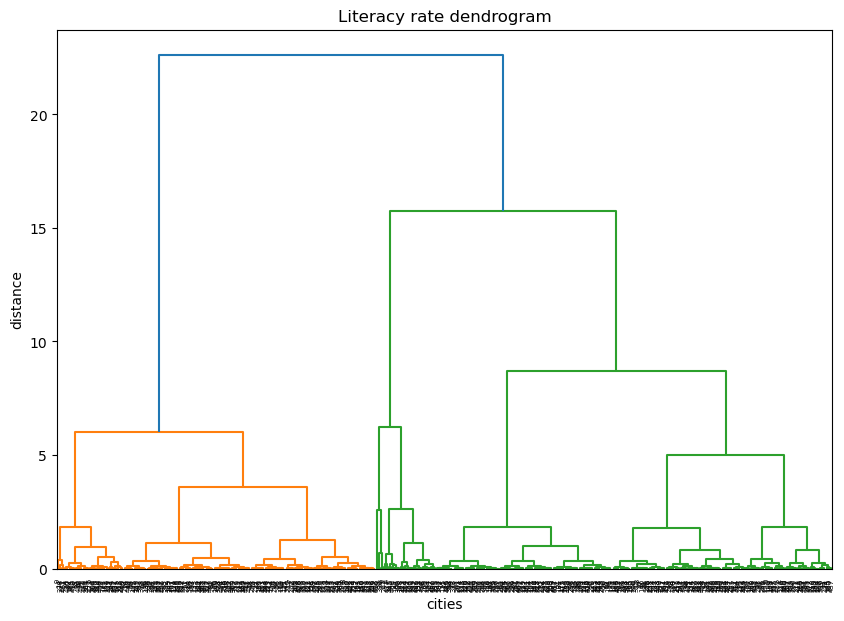

In [57]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Literacy rate dendrogram")
plt.xlabel("cities")
plt.ylabel("distance")
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward')) # its not necessary to use scaled data hierarchical clustering

From above dendrogram we can conclude that number of clusters are 2

### Using Agglomerative Clustering with K clusters

In [64]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_ = cluster.fit_predict(scaled_data)

In [65]:
labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2,

Text(0.5, 1.0, 'Agglomerative Clustering')

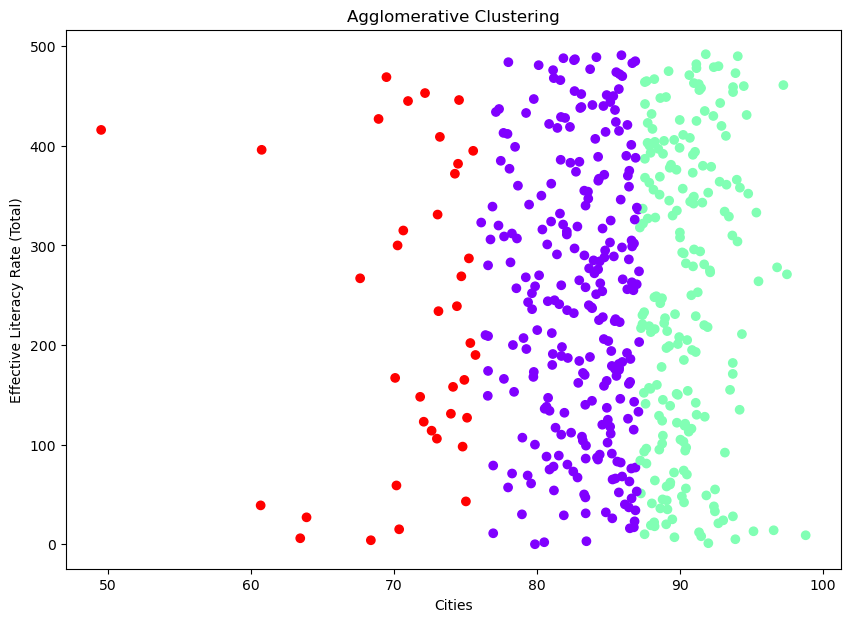

In [68]:
plt.figure(figsize=(10,7))
plt.scatter( data, data.index, c=cluster.labels_, cmap='rainbow')
plt.xlabel('Cities')
plt.ylabel('Effective Literacy Rate (Total)')
plt.title('Agglomerative Clustering')